# Numpyの確認課題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします．

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

---

### 問1. `ndarray`の生成

以下の2つの`ndarray`を定義しなさい．
- 観測値 `x`: 初項`0`，末項`5`，項数`100`の等差数列
- ノイズ `noise`: 標準正規分布に従う`100`個の乱数

In [9]:
x = np.arange(0, 5, 0.05)
noise = np.random.randn(100)
x, noise

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 ,
        2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25,
        3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 ,
        3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35,
        4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 ,
        4.95]),
 array([ 1.8831507 , -1.34775906, -1.270485  ,  0.96939671, -1.17312341,
         1.94362119, -0.41361898, -0.74745481,  1.92294203,  1.48051479,
         1.86755896,  0.90604466, -0.86122569,  1.91006495, -0.26800337,
         0.8024564 ,  0.94725197, -0.15501009,  0.61407937,  0.92220667,
         0.37642553, -1.09

---

ここで，真の関数 $y(x) = 3 - 5x + x^2$ を定義します．

In [10]:
def y(x):
    """真の関数"""
    return 3 - 5 * x + x ** 2

### 問2． `ndarray`の操作

問1で生成した観測値 `x` に対応する目標値 `t` を定義しなさい．

目標値 $t$ は， $t = y(x) + \epsilon$ と表されます．  ( $y$: 真の関数, $\epsilon$: ノイズ )  
実際の観測値にはどうしてもノイズ(観測誤差)が発生してしまいます．今回は，それを`noise`で再現します．

問1で観測値を100個生成したので，それぞれに対応する目標値も100個作成する必要がありますが， `for` 文は絶対使ってはいけません．

In [11]:
t = y(x) + noise
t.shape

(100,)

matplotlib で可視化すると以下のようなグラフになります．
scatter → 散布図

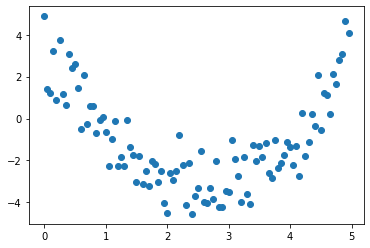

In [12]:
plt.scatter(x, t)

---

### 問3. `ndarray`の結合

以下の3つの`ndarray`を垂直方向に結合した2次元配列を転置した行列 `X` を定義しなさい．

- x0: 長さが `x` と同じで要素が全て1の`ndarray`
- x1: 観測値 `x` の各要素を1乗した`ndarray`
- x2: 観測値 `x` の各要素を2乗した`ndarray`

例： $x = (1, 2, 3)$ のとき，

$$
x_0 = (1, 1, 1)\\
x_1 = (1, 2, 3)\\
x_2 = (1, 4, 9)
$$

だから，

$$
X = \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 3 \\
    1 & 4 & 9
\end{array}
\right)^T
= \left(
\begin{array}{ccc}
    1 & 1 & 1 \\
    1 & 2 & 4 \\
    1 & 3 & 9
\end{array}
\right)
$$

ちなみに，機械学習では `X` のような行列を計画行列と呼びます．

In [15]:
X = np.array([[1]*len(x), x, x**2]).T
X

array([[1.00000e+00, 0.00000e+00, 0.00000e+00],
       [1.00000e+00, 5.00000e-02, 2.50000e-03],
       [1.00000e+00, 1.00000e-01, 1.00000e-02],
       [1.00000e+00, 1.50000e-01, 2.25000e-02],
       [1.00000e+00, 2.00000e-01, 4.00000e-02],
       [1.00000e+00, 2.50000e-01, 6.25000e-02],
       [1.00000e+00, 3.00000e-01, 9.00000e-02],
       [1.00000e+00, 3.50000e-01, 1.22500e-01],
       [1.00000e+00, 4.00000e-01, 1.60000e-01],
       [1.00000e+00, 4.50000e-01, 2.02500e-01],
       [1.00000e+00, 5.00000e-01, 2.50000e-01],
       [1.00000e+00, 5.50000e-01, 3.02500e-01],
       [1.00000e+00, 6.00000e-01, 3.60000e-01],
       [1.00000e+00, 6.50000e-01, 4.22500e-01],
       [1.00000e+00, 7.00000e-01, 4.90000e-01],
       [1.00000e+00, 7.50000e-01, 5.62500e-01],
       [1.00000e+00, 8.00000e-01, 6.40000e-01],
       [1.00000e+00, 8.50000e-01, 7.22500e-01],
       [1.00000e+00, 9.00000e-01, 8.10000e-01],
       [1.00000e+00, 9.50000e-01, 9.02500e-01],
       [1.00000e+00, 1.00000e+00, 1.0000

---

### 問4. 線形代数

観測値 `x, t` をもとに真の関数 `y` を2次関数で回帰しなさい．

任意の2次関数は $y(x) = w_0 + w_1 x + w_2 x^2$ と表すことができます．
なので，パラメータのベクトル $\mathbf{w} = (w_0, w_1, w_2)$ を求めれば良いことになります．

これは以下の正規方程式から求めることができます．

$ \mathbf{w} = (X^T X)^{-1} X^T \mathbf{t} $

この式の導出はdev_data勉強会で学びます．

行列の積が多い場合は`np.dot`を使わない方が簡潔に書けます．

In [21]:
dot_1 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), t)
w0, w1, w2 = dot_1[0], dot_1[1], dot_1[2]
pred_y = w0 + w1 * x + w2 * x ** 2

---

### 結果

先ほどのグラフに真の関数(緑)と回帰曲線(赤)を重ねると以下のようになります．

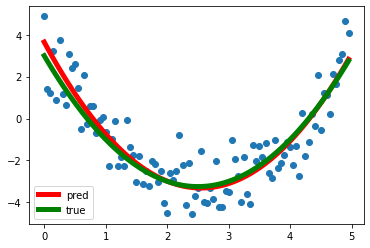

In [22]:
plt.scatter(x, t)
plt.plot(x, pred_y, linewidth=5, color="red", label="pred")
plt.plot(x, y(x), linewidth=5, color="green", label="true")
plt.legend()

今回使った手法は 真の関数 `y` の定義を変更するとその他のコードを全く変更しなくても同様に回帰することができます．

例えば以下のように変更したらその関数を回帰します．

```python
def y(x):
    """真の関数"""
    return 5 * np.sin(np.pi * x / 5)
```
dev_data勉強会で詳しくやりますが，この回帰曲線の表現力は2次までです．
カーブが2つ以上の曲線を回帰したい場合は問3の計画行列の列数を　`x3, x4...`　のように増やせば表現力が上がります．